**Set up notebook:**

In [ ]:
!pip install ipympl

In [1]:
#Configure Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to dataset folder
data_folder = '/content/drive/My Drive/MA/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#Import required libraries for this notebook
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

from google.colab import output
output.enable_custom_widget_manager()

**Load dataset:**

In [3]:
#Read WTG data
signals = 'wind-farm-1-signals-training.csv'
signals_test = 'wind-farm-1-signals-testing.csv'
all_data = pd.concat([pd.read_csv(data_folder + signals, delimiter=';'), pd.read_csv(data_folder + signals_test, delimiter=';')], ignore_index=True)
all_data['Timestamp'] = pd.to_datetime(all_data['Timestamp'])
all_data.set_index('Timestamp', inplace=True)

#Filter T_01 data out
wtg_data = all_data[all_data.Turbine_ID == 'T06']

#wtg_data = wtg_data[wtg_data['Grd_Prod_Pwr_Avg'] > 0]
print(wtg_data.dtypes)
wtg_data.head()

Turbine_ID                object
Gen_RPM_Max              float64
Gen_RPM_Min              float64
Gen_RPM_Avg              float64
Gen_RPM_Std              float64
                          ...   
Grd_Prod_PsbleCap_Max    float64
Grd_Prod_PsbleCap_Min    float64
Grd_Prod_PsbleCap_Std    float64
Gen_Bear2_Temp_Avg         int64
Nac_Direction_Avg        float64
Length: 82, dtype: object


,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,T06,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,30,...,-307.1,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6
2016-01-01 00:10:00+00:00,T06,1429.7,203.9,1154.1,271.7,42.0,51,52,52,30,...,-70.5,0.0,-1000.0,154.1,70.5,1000.0,0.0,154.1,35,210.5
2016-01-01 00:20:00+00:00,T06,1360.5,250.3,1041.4,382.7,42.0,50,51,51,31,...,-57.5,0.0,-587.9,115.8,57.5,587.9,0.0,115.8,35,199.0
2016-01-01 00:30:00+00:00,T06,1399.2,1228.8,1252.5,16.5,42.0,49,50,50,31,...,-493.2,0.0,-1000.0,237.5,493.2,1000.0,0.0,237.5,35,205.6
2016-01-01 00:40:00+00:00,T06,1302.7,1225.1,1257.6,13.4,41.0,50,50,51,31,...,-872.3,-556.0,-1000.0,150.9,872.3,1000.0,556.0,150.9,35,207.4


In [4]:
wtg_data.tail()

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-12-31 23:10:00+00:00,T06,1541.1,1291.1,1392.7,70.0,44.0,58,60,59,29,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,46,306.9
2017-12-31 23:20:00+00:00,T06,1549.9,1247.2,1381.9,79.7,44.0,58,60,59,29,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,44,315.9
2017-12-31 23:30:00+00:00,T06,1257.7,1240.7,1249.6,2.7,43.0,57,59,59,29,...,-888.3,-603.6,-1000.0,111.3,888.3,1000.0,603.6,111.3,43,315.9
2017-12-31 23:40:00+00:00,T06,1259.8,1240.9,1250.3,2.8,43.0,57,59,58,28,...,-849.2,-605.1,-1000.0,118.3,849.2,1000.0,605.1,118.3,42,315.9
2017-12-31 23:50:00+00:00,T06,1270.8,1229.6,1249.4,6.6,42.0,56,58,58,28,...,-793.6,-99.8,-1000.0,259.5,793.6,1000.0,99.8,259.5,40,325.1


In [5]:
#Read log data
logs = 'wind-farm-1-logs-training.csv'
logs_test = 'wind-farm-1-logs-testing.csv'
log_data = pd.concat([pd.read_csv(data_folder + logs, delimiter=';'), pd.read_csv(data_folder + logs_test, delimiter=';')], ignore_index=True)
log_data['TimeDetected'] = pd.to_datetime(log_data['TimeDetected'])
log_data.set_index('TimeDetected', inplace=True)
log_data = log_data[log_data['UnitTitle'] == 'T06']
log_data.head()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2016-01-01 00:07:15+00:00,NaN,T06,Generator 1 in,NaN
2016-01-01 00:19:59+00:00,NaN,T06,Generator 1 in,NaN
2016-01-01 00:26:02+00:00,NaN,T06,External power ref.:2000kW,NaN
2016-01-01 00:56:02+00:00,NaN,T06,External power ref.:2000kW,NaN
2016-01-01 01:26:02+00:00,NaN,T06,External power ref.:2000kW,NaN


In [6]:
log_data.tail()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2017-12-31 23:47:45+00:00,NaN,T06,Wind: 4.9 m/s Gen:1243.2 RPM,NaN
2017-12-31 23:47:45+00:00,NaN,T06,Pitch: -0.8° Power: 143.1 kW,NaN
2017-12-31 23:48:41+00:00,NaN,T06,External power ref.:2000kW,NaN
2017-12-31 23:58:57+00:00,NaN,T06,Production Low Wind TimeOut,NaN
2017-12-31 23:58:58+00:00,NaN,T06,Generator 0 out,NaN


In [7]:
#@title Following failures were reported for the turbine:


In [8]:
#@title Failure 1: HYDRAULIC_GROUP April 4, 2016 6:53 PM Error in pitch regulation


In [9]:
#Logs containing "rotor": related to pitch regulation error
logs_1 = log_data[log_data.Remark.str.contains('rotor', na=False, case=False)].rename(columns={'Remark' : 'Remark_1'})
logs_1

,TimeReset,UnitTitle,Remark_1,UnitTitleDestination
TimeDetected,,,,
2016-04-04 16:26:17+00:00,2016-04-04 16:27:22,T06,"Rotor:14.5RPM, Gen.:1671.4 RPM",NaN
2016-04-04 17:43:43+00:00,2016-04-04 17:44:50,T06,"Rotor:14.5RPM, Gen.:1671.3 RPM",NaN
2016-04-04 18:04:49+00:00,2016-04-04 18:05:55,T06,"Rotor:14.7RPM, Gen.:1705.6 RPM",NaN
2016-04-04 18:07:02+00:00,2016-04-04 18:08:18,T06,"Rotor:13.6RPM, Gen.:1647.8 RPM",NaN
2016-04-04 18:17:11+00:00,2016-04-04 18:19:46,T06,"Rotor:14.4RPM, Gen.:1656.1 RPM",NaN
2016-04-04 18:26:16+00:00,2016-04-04 19:25:21,T06,"Rotor:11.6RPM, Gen.:1692.4 RPM",NaN
2016-07-21 19:47:39+00:00,2016-07-22 15:48:18,T06,High cur.rotor inv. L3:2316A,NaN
2016-07-22 15:47:03+00:00,NaN,T06,High cur.rotor inv. L0: 2A,NaN
2016-08-15 11:07:28+00:00,2016-08-15 11:08:54,T06,"No RT, High Rotor Cur L1:2736A",NaN


In [10]:
#@title Failure 2: GENERATOR July 11, 2016 7:48 PM Generator replaced


In [11]:
#Logs containing "Gen1": related to generator 1 damage
logs_2 = log_data[log_data.Remark.str.contains('Gen1', na=False, case=False)].rename(columns={'Remark' : 'Remark_2'})
logs_2

,TimeReset,UnitTitle,Remark_2,UnitTitleDestination
TimeDetected,,,,
2016-11-02 11:41:12+00:00,NaN,T06,High temperature Gen1: 204°C,NaN


In [12]:
#@title Failure Group 3: GENERATOR September 4, 2016 8:08 AM High temperature generator error; October 2, 2016 5:08 PM Refrigeration system and temperature sensors in generator replaced; October 27, 2016 4:26 PM Generator replaced

In [13]:
#Logs containing "Gen2": related to generator 2 damage
logs_3 = log_data[log_data.Remark.str.contains('Gen2', na=False, case=False)].rename(columns={'Remark' : 'Remark_3'})
logs_3

,TimeReset,UnitTitle,Remark_3,UnitTitleDestination
TimeDetected,,,,
2016-09-04 08:08:32+00:00,2016-09-04 08:19:07,T06,High temperature Gen2: 204°C,NaN
2016-09-04 08:23:49+00:00,2016-09-04 08:35:12,T06,High temperature Gen2: 158°C,NaN
2016-09-04 12:20:21+00:00,2016-09-04 12:31:03,T06,High temperature Gen2: 155°C,NaN
2016-09-30 22:08:48+00:00,2016-09-30 23:46:33,T06,High temperature Gen2: 193°C,NaN
2016-09-30 23:52:43+00:00,2016-10-01 00:03:13,T06,High temperature Gen2: 169°C,NaN
2016-10-01 00:07:41+00:00,2016-10-01 00:19:28,T06,High temperature Gen2: 185°C,NaN
2016-10-01 00:23:00+00:00,2016-10-01 00:34:04,T06,High temperature Gen2: 202°C,NaN
2016-10-01 00:38:25+00:00,2016-10-01 00:50:46,T06,High temperature Gen2: 204°C,NaN
2016-10-01 03:23:25+00:00,2016-10-01 03:35:10,T06,High temperature Gen2: 204°C,NaN


In [14]:
#@title Failure 4: HYDRAULIC_GROUP August 19, 2017 9:47 AM Oil leakage in Hub


In [15]:
#Logs containing "leakage": related to oil leakage error
logs_4 = log_data[log_data.Remark.str.contains('leakage', na=False, case=False)].rename(columns={'Remark' : 'Remark_4'})
logs_4

,TimeReset,UnitTitle,Remark_4,UnitTitleDestination
TimeDetected,,,,
2017-08-19 00:36:19+00:00,2017-08-19 00:53:38,T06,Oil leakage in Hub,NaN
2017-08-19 03:33:03+00:00,2017-08-19 03:46:45,T06,Oil leakage in Hub,NaN
2017-08-19 03:47:31+00:00,2017-08-19 10:42:37,T06,Oil leakage in Hub,NaN
2017-08-19 09:55:10+00:00,NaN,T06,Oil leakage in Hub,NaN


In [16]:
#@title Failure 5: GEARBOX October 17, 2017 8:38 AM Gearbox bearings damaged


In [17]:
#NO RELEVANT LOGS FOUND
logs_5 = log_data[log_data.Remark.str.contains('bear', na=False, case=False)].rename(columns={'Remark' : 'Remark_5'})
logs_5

,TimeReset,UnitTitle,Remark_5,UnitTitleDestination
TimeDetected,,,,
2016-11-02 11:42:00+00:00,NaN,T06,High temp. Gen bearing 2:204°C,NaN


In [18]:
#Create a new column to label the signals: 'F1'/'F2'/'F3'/'F4'/'F5' : Log entry related to 1st/2nd/3rd/4th/5th Failure was found during the previous 10 min, 
#'Reported' : Failure reported by the technician at this time, 'None': nothing reported or logged
#Initialize to 'None'
wtg_data['Failure'] = 'None'

#Join with log data for Failure 1
wtg_data = pd.merge_asof(wtg_data, logs_1['Remark_1'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F1'
wtg_data.loc[wtg_data.Remark_1.str.contains('rotor', na=False, case=False), 'Failure'] = 'F1'

#Join with log data for Failure 2
wtg_data = pd.merge_asof(wtg_data, logs_2['Remark_2'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F2'
wtg_data.loc[wtg_data.Remark_2.str.contains('Gen1', na=False, case=False), 'Failure'] = 'F2'

#Join with log data for Failure 3
wtg_data = pd.merge_asof(wtg_data, logs_3['Remark_3'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F3'
wtg_data.loc[wtg_data.Remark_3.str.contains('Gen2', na=False, case=False), 'Failure'] = 'F3'

#Join with log data for Failure 4
wtg_data = pd.merge_asof(wtg_data, logs_4['Remark_4'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F4'
wtg_data.loc[wtg_data.Remark_4.str.contains('leakage', na=False, case=False), 'Failure'] = 'F4'

#Label reported failures
wtg_data.loc['2016-04-04 19:00:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2016-07-11 19:50:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2016-07-24 17:10:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2016-09-04 08:10:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2016-10-02 17:10:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2016-10-27 16:30:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2017-08-19 09:50:00+00:00', 'Failure'] = 'Reported'
wtg_data.loc['2017-10-17 08:40:00+00:00', 'Failure'] = 'Reported'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
#Validate
wtg_data['2016-04-04' : '2016-04-04'].dropna(subset=['Remark_1'])

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Failure,Remark_1,Remark_2,Remark_3,Remark_4
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-04-04 16:30:00+00:00,T06,1811.8,8.7,1431.9,541.7,69.0,101.0,110.0,113.0,46.0,...,1000.0,0.0,231.4,59.0,231.6,F1,"Rotor:14.5RPM, Gen.:1671.4 RPM",NaN,NaN,NaN
2016-04-04 17:50:00+00:00,T06,1782.7,7.4,1425.3,547.9,80.0,100.0,109.0,112.0,47.0,...,1000.0,0.0,218.4,59.0,237.9,F1,"Rotor:14.5RPM, Gen.:1671.3 RPM",NaN,NaN,NaN
2016-04-04 18:10:00+00:00,T06,1786.7,7.8,1148.7,696.1,80.0,99.0,108.0,109.0,48.0,...,1000.0,0.0,279.4,59.0,253.0,F1,"Rotor:13.6RPM, Gen.:1647.8 RPM",NaN,NaN,NaN
2016-04-04 18:20:00+00:00,T06,1774.4,8.6,1239.5,721.2,78.0,95.0,103.0,105.0,48.0,...,831.2,0.0,200.2,58.0,260.3,F1,"Rotor:14.4RPM, Gen.:1656.1 RPM",NaN,NaN,NaN
2016-04-04 18:30:00+00:00,T06,1728.7,5.3,1017.2,776.1,77.0,91.0,98.0,98.0,42.0,...,1000.0,0.0,371.7,57.0,269.4,F1,"Rotor:11.6RPM, Gen.:1692.4 RPM",NaN,NaN,NaN


In [20]:
wtg_data = wtg_data[~wtg_data.index.duplicated()]
x='Timestamp'
c1= '#d3d3d3'
style = 'Failure'
hue = 'Failure'
s = 80

<AxesSubplot:xlabel='Timestamp', ylabel='Hyd_Oil_Temp_Avg'>

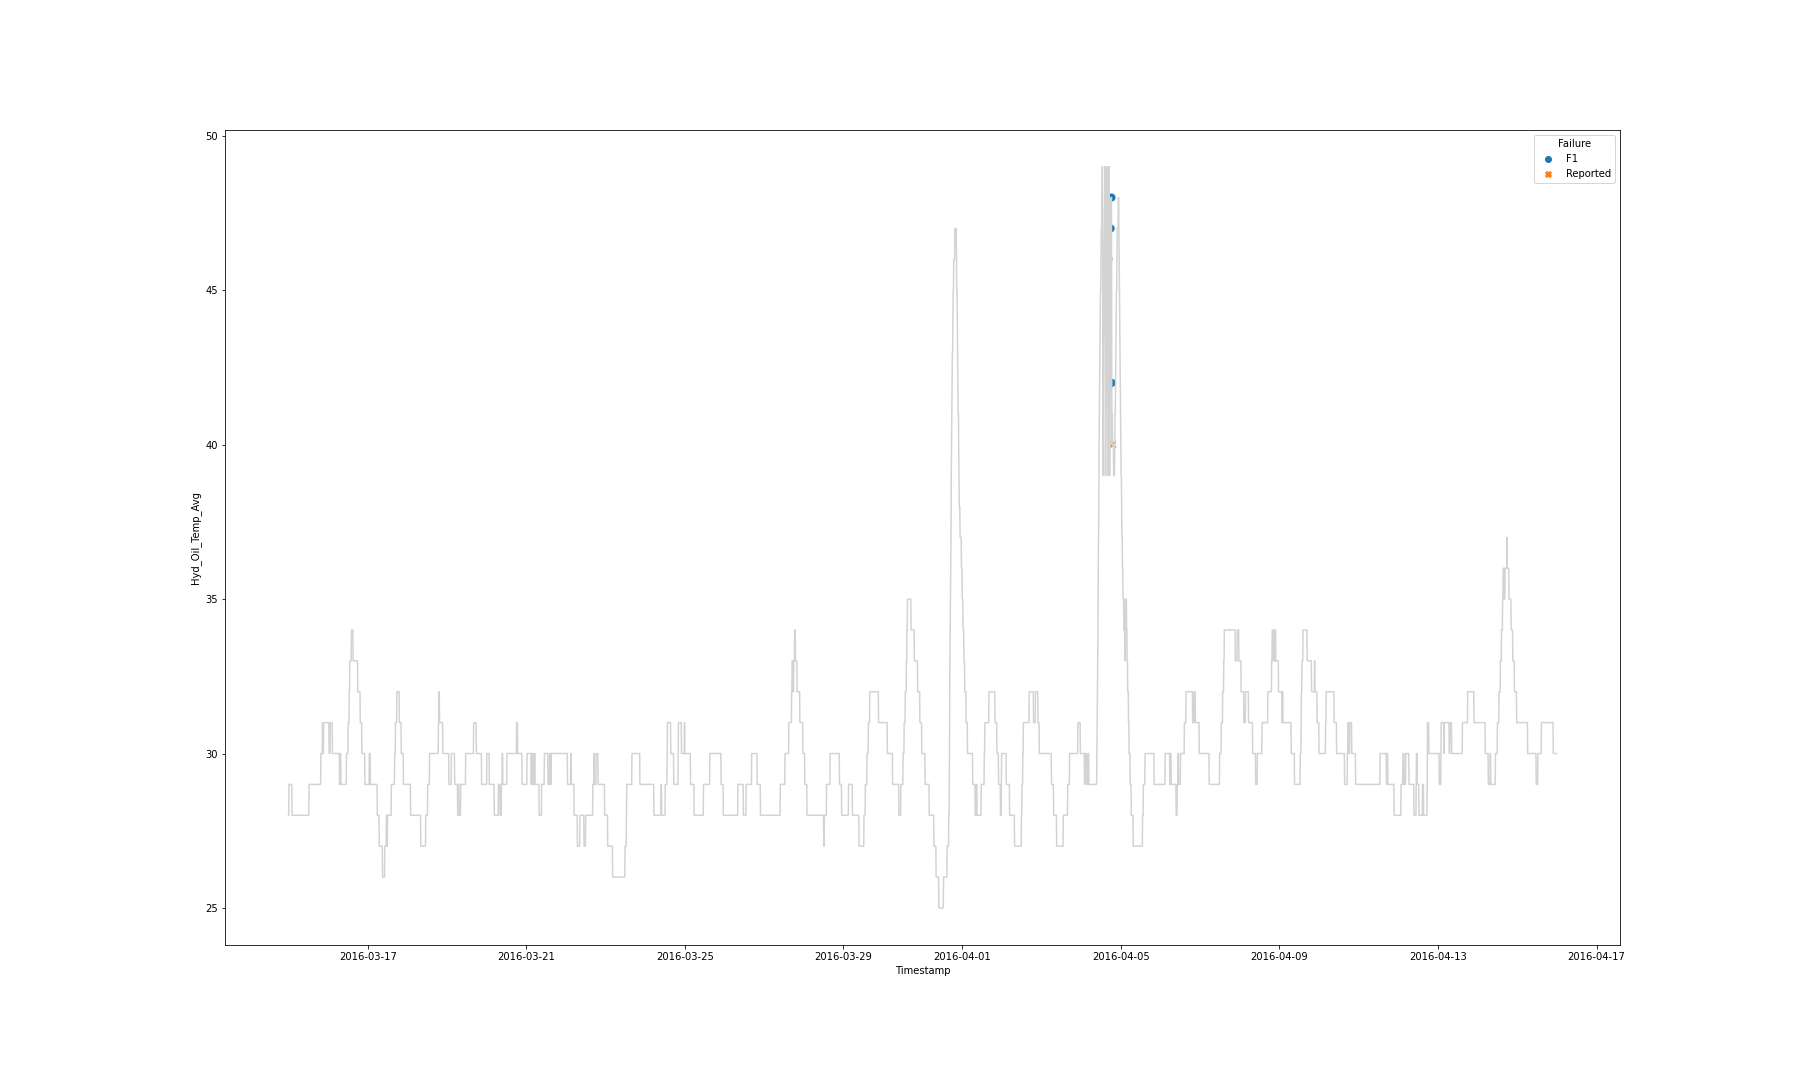

In [27]:
%matplotlib widget
#Visualize Failure 1
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2016-03-15' : '2016-04-15']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

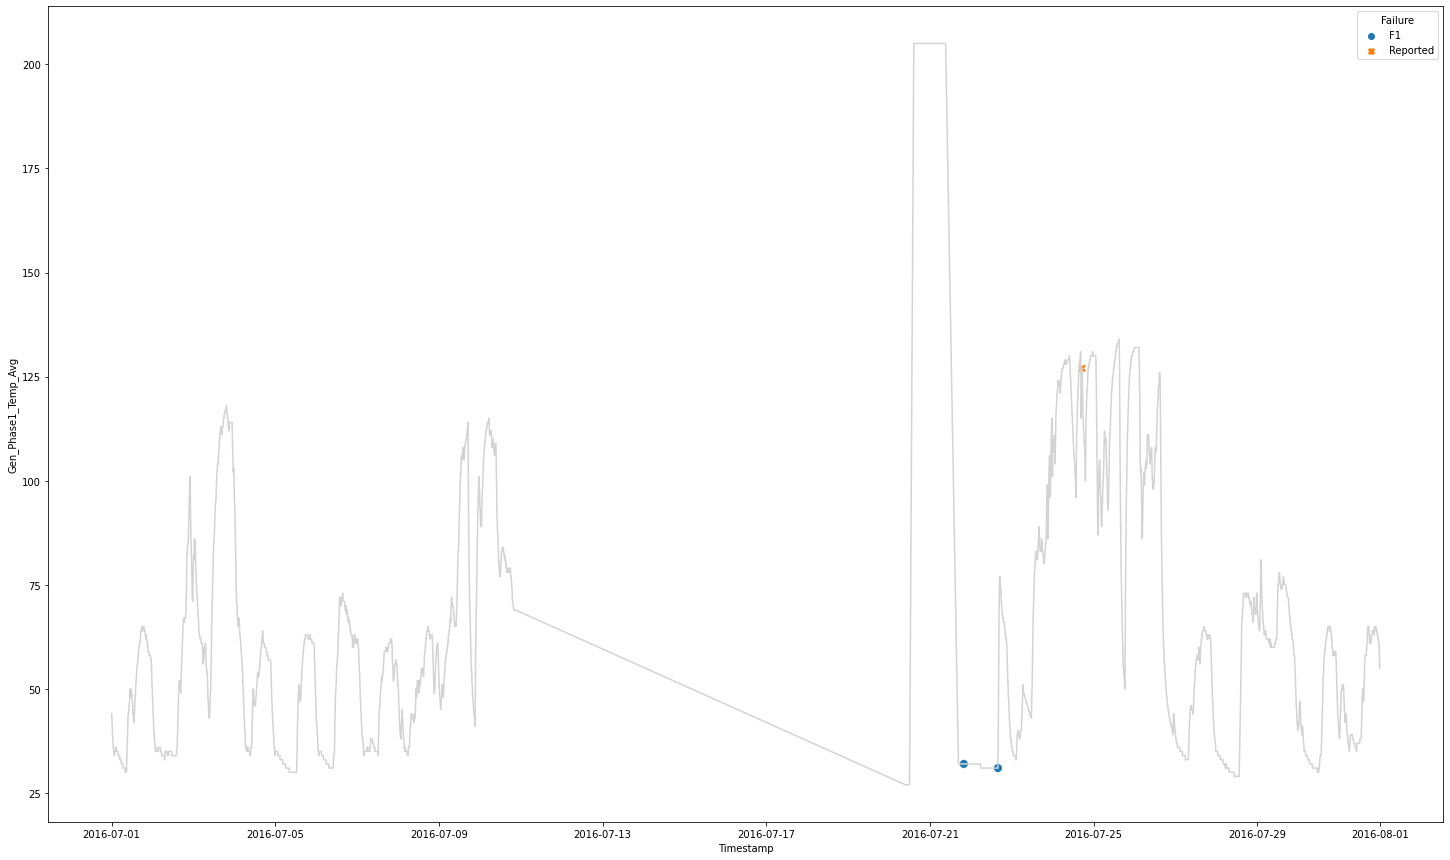

In [ ]:
#Visualize Failure 2
y = 'Gen_Phase1_Temp_Avg'
data = wtg_data['2016-07-01' : '2016-07-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

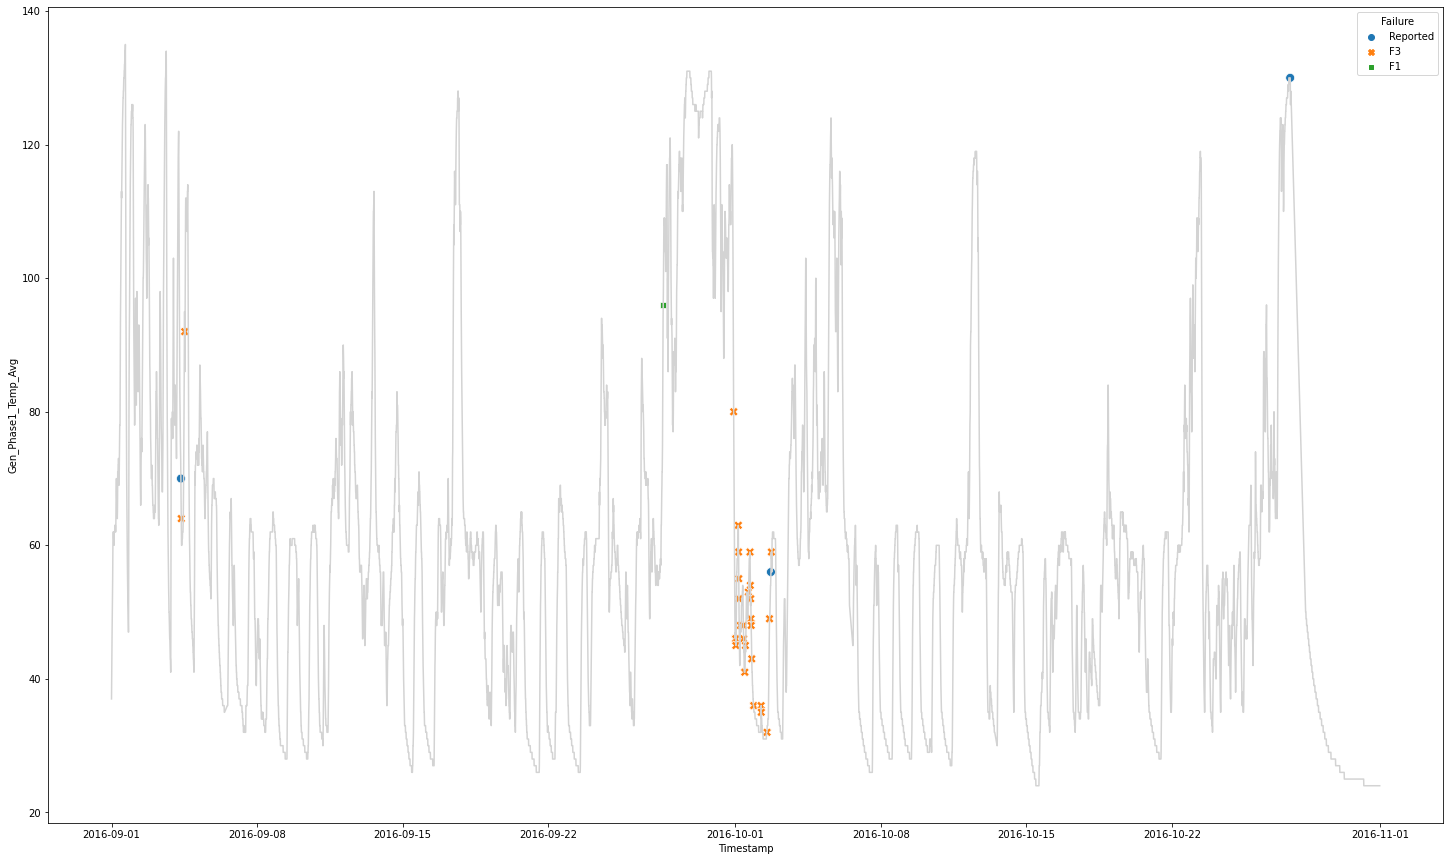

In [ ]:
#Visualize Failure 3 (Phase 1 Temp)
y = 'Gen_Phase1_Temp_Avg'
data = wtg_data['2016-09-01' : '2016-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

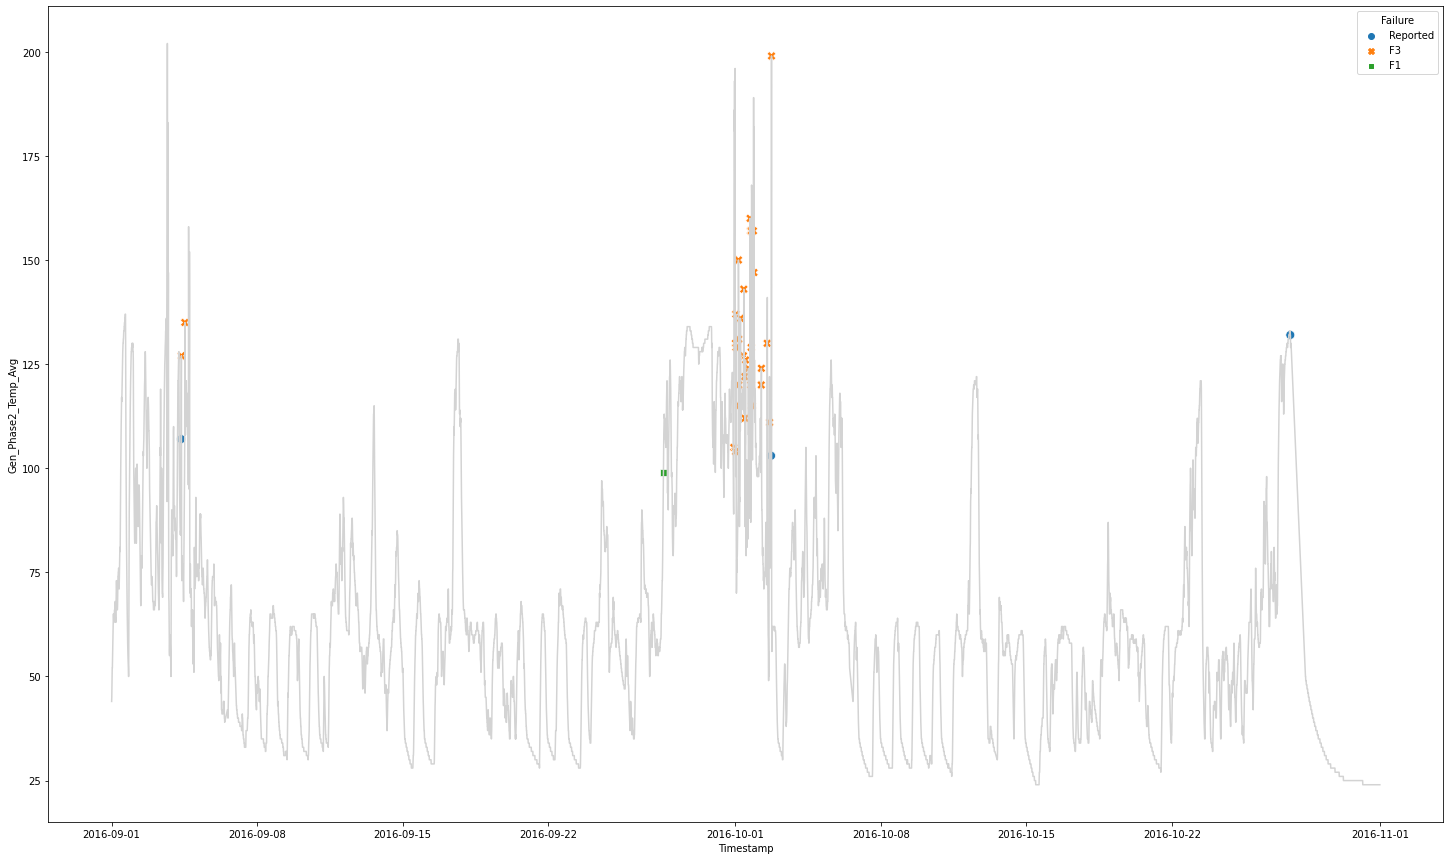

In [ ]:
#Visualize Failure 3 (Phase 2 Temp)
y = 'Gen_Phase2_Temp_Avg'
data = wtg_data['2016-09-01' : '2016-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

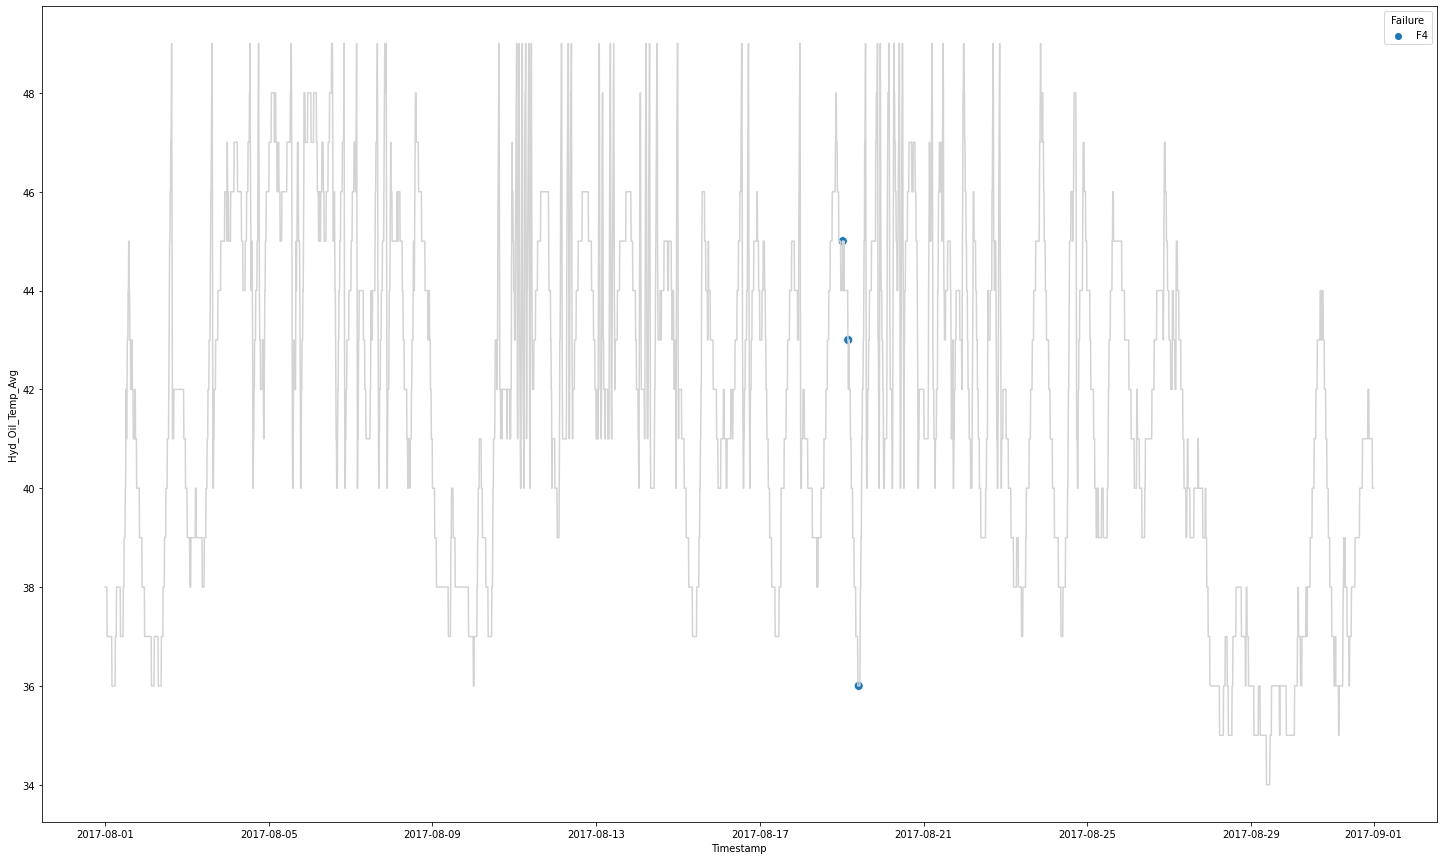

In [ ]:
#Visualize Failure 4
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2017-08-01' : '2017-08-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

In [ ]:
wtg_data['2017-08-19 09:50:00+00:00']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Failure,Remark_1,Remark_2,Remark_3,Remark_4
Timestamp,,,,,,,,,,,,,,,,,,,,,


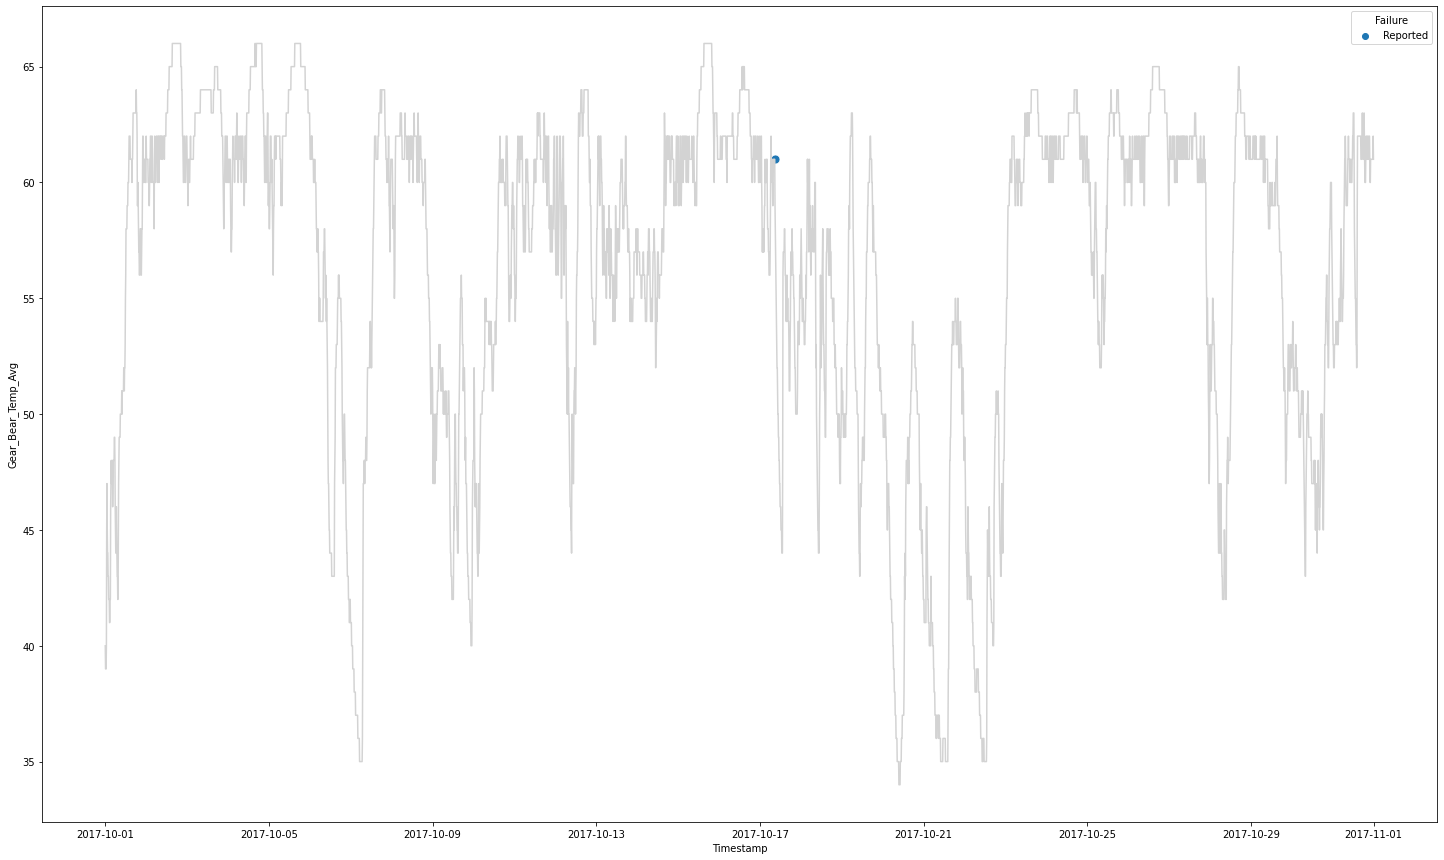

In [ ]:
#Visualize Failure 5
y = 'Gear_Bear_Temp_Avg'
data = wtg_data['2017-10-01' : '2017-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])